## Global Historical Climatology Network Dataset
Variables are stored in both rows and columns
This dataset represents the daily weather records for a weather station (MX17004) in Mexico for five months in 2010.

In [1]:
import os                   # se importan librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datos=pd.read_csv(os.path.join('../weather-raw.csv'))   # se cargan los datos
display(datos.head())

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#datos.info()          # informacion de no nulos
datos.describe()       # descripcion estadistica

,year,month,d1,d2,d3,d4,d5,d6,d7,d8,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
count,22.0,22.000000,2.000000,4.000000,4.000000,2.000000,8.000000,2.000000,2.000000,2.000000,...,0.0,4.000000,0.0,2.000000,2.000000,6.000000,2.00000,4.000000,2.00000,2.000000
mean,2010.0,6.272727,21.850000,22.325000,21.150000,19.600000,20.862500,19.150000,20.500000,23.150000,...,NaN,20.500000,NaN,22.650000,20.100000,24.383333,23.10000,22.850000,21.15000,20.400000
std,0.0,3.601347,11.384419,8.254443,6.405466,10.748023,8.904243,12.232947,10.748023,8.273149,...,NaN,9.118845,NaN,9.970206,11.313708,9.292022,11.45513,7.294062,9.40452,7.071068
min,2010.0,1.000000,13.800000,14.400000,14.400000,12.000000,7.900000,10.500000,12.900000,17.300000,...,NaN,10.700000,NaN,15.600000,12.100000,14.200000,15.00000,15.300000,14.50000,15.400000
25%,2010.0,3.250000,17.825000,15.825000,16.725000,15.800000,14.150000,14.825000,16.700000,20.225000,...,NaN,13.925000,NaN,19.125000,16.100000,17.075000,19.05000,17.325000,17.82500,17.900000
50%,2010.0,6.000000,21.850000,21.800000,20.800000,19.600000,21.050000,19.150000,20.500000,23.150000,...,NaN,20.700000,NaN,22.650000,20.100000,22.950000,23.10000,23.000000,21.15000,20.400000
75%,2010.0,9.500000,25.875000,28.300000,25.225000,23.400000,27.650000,23.475000,24.300000,26.075000,...,NaN,27.275000,NaN,26.175000,24.100000,31.825000,27.15000,28.525000,24.47500,22.900000
max,2010.0,12.000000,29.900000,31.300000,28.600000,27.200000,32.100000,27.800000,28.100000,29.000000,...,NaN,29.900000,NaN,29.700000,28.100000,36.300000,31.20000,30.100000,27.80000,25.400000


In [4]:
null=datos.isna().sum()       # se miran los valores nulos
null[null>0]

d1     20
d2     18
d3     18
d4     20
d5     14
d6     20
d7     20
d8     20
d9     22
d10    20
d11    20
d12    22
d13    20
d14    18
d15    20
d16    20
d17    20
d18    22
d19    22
d20    22
d21    22
d22    22
d23    18
d24    22
d25    20
d26    20
d27    16
d28    20
d29    18
d30    20
d31    20
dtype: int64

In [5]:
# me quedo solo con los datos de los sensores y pongo a cero los NaN para bucle
 
datos=datos.fillna(0)
datos=datos.iloc[:,4::]   # todas las columnas desde la 5ª
datos=datos.transpose()
display(datos)            # ahora cada columna es t_max o t_min de cada mes, falta septiembre

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.9,13.8
d2,0.0,0.0,27.3,14.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,31.3,16.3,0.0,0.0
d3,0.0,0.0,24.1,14.4,0.0,0.0,0.0,0.0,0.0,0.0,...,28.6,17.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27.2,12.0,0.0,0.0
d5,0.0,0.0,0.0,0.0,32.1,14.2,0.0,0.0,0.0,0.0,...,0.0,0.0,29.6,15.8,27.0,14.0,26.3,7.9,0.0,0.0
d6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.8,10.5
d7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28.1,12.9,0.0,0.0,0.0,0.0
d8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,29.0,17.3,0.0,0.0,0.0,0.0,0.0,0.0
d9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d10,0.0,0.0,0.0,0.0,34.5,16.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# extraigo los datos de temperatura

lista=[datos[c] for c in datos]                # lista de cada columna de los datos              
t_Max=[np.mean([e for e in lista[i] if e!=0]) for i in range(len(lista)) if i%2==0]  # temperatura maxima
t_min=[np.mean([e for e in lista[i] if e!=0]) for i in range(len(lista)) if i%2==1]  # temperatura minima

 # septiembre falta, hago la media de los meses adyacentes y luego las inserto en la lista
sep_M=(t_Max[7]+t_Max[8])/2
sep_m=(t_min[7]+t_min[8])/2
t_Max.insert(8, sep_M)
t_min.insert(8, sep_m)

In [7]:
print (t_Max)
print (t_min)

[27.8, 27.75, 32.56666666666666, 36.3, 33.2, 29.05, 29.25, 28.271428571428572, 28.585714285714285, 28.9, 28.119999999999997, 28.85]
[14.5, 13.225000000000001, 16.2, 16.7, 18.2, 17.75, 17.0, 15.842857142857142, 14.461428571428572, 13.080000000000002, 12.5, 12.15]


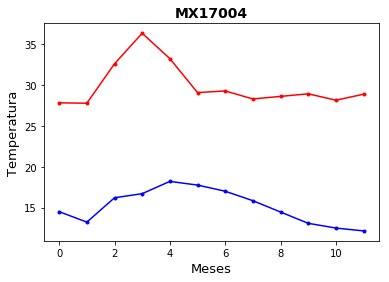

In [8]:
plt.plot([i for i in range(12)], t_Max, linestyle='-', marker='.',color = 'r')  # plot rojo temp Max
plt.plot([i for i in range(12)], t_min, linestyle='-', marker='.',color = 'b')  # plot azul temp min
plt.xlabel('Meses',size=13)
plt.ylabel('Temperatura',size=13)
plt.title('MX17004',size=14,fontweight='bold')
plt.savefig('temperaturas_MX17004.png', format='png')   # guarda imagen
plt.show()

In [9]:
# construyo el dataframe completamente limpiado
Meses=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']

weather=pd.DataFrame(columns=Meses)
weather=weather.transpose()
weather['T_Max']=t_Max
weather['T_min']=t_min
weather.to_csv('weather.csv')  # se guarda el nuevo dataframe
display(weather)

,T_Max,T_min
Enero,27.800000,14.500000
Febrero,27.750000,13.225000
Marzo,32.566667,16.200000
Abril,36.300000,16.700000
Mayo,33.200000,18.200000
Junio,29.050000,17.750000
Julio,29.250000,17.000000
Agosto,28.271429,15.842857
Septiembre,28.585714,14.461429
Octubre,28.900000,13.080000
